In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Thailand_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,1777,4,112.1,88164
1,1992,NaN,2000,4,113.2,63625
2,1993,NaN,2219,9,114.2,119232
3,1994,NaN,2495,9,115.3,100817
4,1995,NaN,2846,10,116.4,106565


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,26.000000
mean,2003.500000,2.339333,3496.076923,19.961538,125.307692,111860.923077
std,7.648529,0.053831,1557.682584,10.596153,7.248223,20598.084924
min,1991.000000,2.247000,1777.000000,4.000000,112.100000,63625.000000
25%,1997.250000,2.303000,2141.000000,10.250000,119.475000,101854.000000
50%,2003.500000,2.324000,2876.000000,24.500000,126.800000,109486.000000
75%,2009.750000,2.393000,4893.750000,29.000000,131.425000,120662.250000
max,2016.000000,2.399000,6157.000000,37.000000,134.800000,169154.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

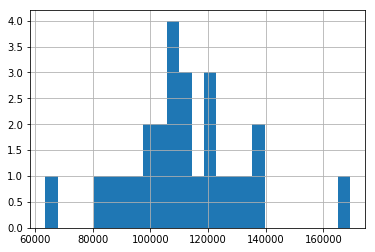

In [7]:
#check population histogram
df['Population'].hist(bins=25)

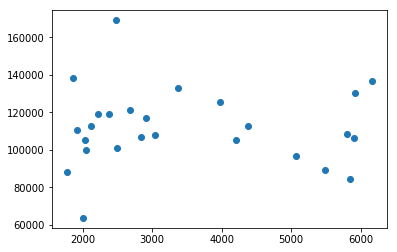

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

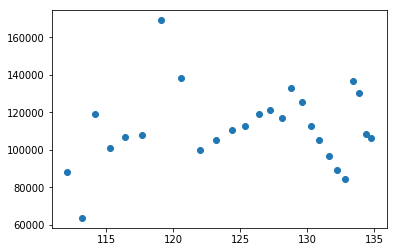

In [9]:
#check relationship between Density and Population
import matplotlib.pyplot as plt
plt.scatter(df['Density'], df['Population'])
plt.show() 

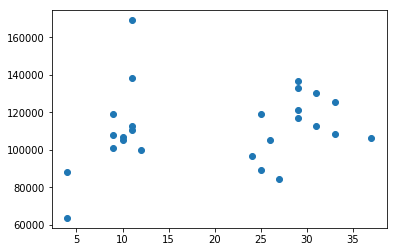

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

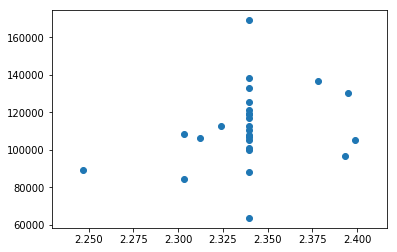

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  112835.859796
Coefficient:  [-0.27886592]
R squared value:  0.000444728677753


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  60775.5329756
Coefficient:  [ 407.67960179]
R squared value:  0.0205800953837


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  103834.106219
Coefficient:  [ 402.1141393]
R squared value:  0.0427899178661


In [15]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -303196.435573
Coefficient:  [ 177425.48816611]
R squared value:  0.068800124114


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  15118.1453891
MAE Score:  11063.2402658
MSE Score:  228558320.005
R squared value:  0.146616805505


In [17]:
# include all variables to build a model
X = df[['Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  13127.9851267
MAE Score:  10051.9396237
MSE Score:  172343993.486
R squared value:  0.0522439035569


In [18]:
# include 3 variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  16872.5264242
MAE Score:  13276.5167948
MSE Score:  284682147.936
R squared value:  0.0969353410833


In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.78563948691
Predicted GDP for year:  2017 [[ 6018.75120192]]
Predicted GDP for year:  2018 [[ 6197.86278045]]
Predicted GDP for year:  2019 [[ 6376.97435897]]
Predicted GDP for year:  2020 [[ 6556.0859375]]
Predicted GDP for year:  2021 [[ 6735.19751603]]
Predicted GDP for year:  2022 [[ 6914.30909455]]


array([[ 5839.6396234]])

In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.973489556657
Predicted Density for year:  2017 [[ 137.72625714]]
Predicted Density for year:  2018 [[ 138.64971439]]
Predicted Density for year:  2019 [[ 139.57317165]]
Predicted Density for year:  2020 [[ 140.4966289]]
Predicted Density for year:  2021 [[ 141.42008615]]
Predicted Density for year:  2022 [[ 142.3435434]]


array([[ 136.80279989]])

In [21]:
#predict the No of Country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.823027810842
Predicted No of country for year:  2017 [[ 37.32240847]]
Predicted No of country for year:  2018 [[ 38.60366139]]
Predicted No of country for year:  2019 [[ 39.88491432]]
Predicted No of country for year:  2020 [[ 41.16616724]]
Predicted No of country for year:  2021 [[ 42.44742017]]
Predicted No of country for year:  2022 [[ 43.7286731]]


array([[ 36.04115554]])

In [22]:
# Forecasted Population of Lebanon
X = df[['GDP','Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)



    
var_2017 = [[6018.75120192,137.72625714,37.32240847]]
var_2018 = [[6197.86278045,138.64971439,38.60366139]]
var_2019 = [[6376.97435897,139.57317165,39.88491432]]                               
var_2020 = [[6556.0859375,140.4966289,41.16616724]]
var_2021 = [[6735.19751603,141.42008615,42.44742017]]
var_2022 = [[6914.30909455,142.3435434,43.7286731]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 114424.55028462]
Predicted Population for year 2018:  [ 114779.55979289]
Predicted Population for year 2019:  [ 115134.56931926]
Predicted Population for year 2020:  [ 115489.57882753]
Predicted Population for year 2021:  [ 115844.58834794]
Predicted Population for year 2022:  [ 116199.59786844]


In [23]:
lm2.predict([[5839.6396234,136.80279989,36.04115554]])

array([ 114069.54076412])